# Recommedation Systems

There are two types of RS:

- Content Based RS: Item Filtering. If one item is mostly liked by the user, then we can recommed this item to the new comer
- Collaborative Based RS: Suppose two users have similar tastes then if one person likes coke, then we can recommed the same    thing to the user.

In [4]:
import numpy as np
import pandas as pd
import warnings

In [5]:
warnings.filterwarnings("ignore")

# Get the Data (Movielens 100K)

In [12]:
columns_name=["user_id","item_id","rating","timestamp"]
df=pd.read_csv("u.data.txt",sep="\t",names=columns_name)
df.head()

,user_id,item_id,rating,timestamp
0,196,242,3,881250949
1,186,302,3,891717742
2,22,377,1,878887116
3,244,51,2,880606923
4,166,346,1,886397596


In [13]:
df.shape

(100000, 4)

In [14]:
df["user_id"].nunique() #unique users

943

In [15]:
df["item_id"].nunique()

1682

In [22]:
df2=pd.read_csv("u.item.txt",sep="\|",header=None)
df2.head()

,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
0,1,Toy Story (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Toy%20Story%2...,0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
1,2,GoldenEye (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?GoldenEye%20(...,0,1,1,0,0,...,0,0,0,0,0,0,0,1,0,0
2,3,Four Rooms (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Four%20Rooms%...,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,4,Get Shorty (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Get%20Shorty%...,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,5,Copycat (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Copycat%20(1995),0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [24]:
df2=df2.iloc[:,0:2]
df2.columns=["item_id","movie_title"]
df2.head()

,item_id,movie_title
0,1,Toy Story (1995)
1,2,GoldenEye (1995)
2,3,Four Rooms (1995)
3,4,Get Shorty (1995)
4,5,Copycat (1995)


In [27]:
df3=pd.merge(df,df2,on="item_id")
df3

,user_id,item_id,rating,timestamp,movie_title
0,196,242,3,881250949,Kolya (1996)
1,63,242,3,875747190,Kolya (1996)
2,226,242,5,883888671,Kolya (1996)
3,154,242,3,879138235,Kolya (1996)
4,306,242,5,876503793,Kolya (1996)
...,...,...,...,...,...
99995,840,1674,4,891211682,Mamma Roma (1962)
99996,655,1640,3,888474646,"Eighth Day, The (1996)"
99997,655,1637,3,888984255,Girls Town (1996)
99998,655,1630,3,887428735,"Silence of the Palace, The (Saimt el Qusur) (1..."


# Exploratory Data Analysis

In [28]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('white')

In [34]:
titles=np.unique(df3["movie_title"])
titles.shape

(1664,)

In [37]:
res=[]
for title in titles:
    t=df3[df3["movie_title"]==title]
    r=t.rating.mean()
    res.append(r)

In [42]:
r=list(zip(titles,res))
r[0]

("'Til There Was You (1997)", 2.3333333333333335)

In [219]:
df4=df3.groupby('movie_title').mean()
df4

,user_id,item_id,rating,timestamp
movie_title,,,,
'Til There Was You (1997),383.777778,1300.0,2.333333,8.861152e+08
1-900 (1994),477.000000,1353.0,2.600000,8.797260e+08
101 Dalmatians (1996),450.330275,225.0,2.908257,8.829281e+08
12 Angry Men (1957),453.552000,178.0,4.344000,8.828963e+08
187 (1997),517.097561,330.0,3.024390,8.850084e+08
...,...,...,...,...
Young Guns II (1990),504.068182,1188.0,2.772727,8.821855e+08
"Young Poisoner's Handbook, The (1995)",452.487805,547.0,3.341463,8.821438e+08
Zeus and Roxanne (1997),532.833333,1164.0,2.166667,8.775338e+08


In [220]:
df4.columns

Index(['user_id', 'item_id', 'rating', 'timestamp'], dtype='object')

In [115]:
df4=df3.groupby('movie_title').mean()['rating']
df4

movie_title
'Til There Was You (1997)                2.333333
1-900 (1994)                             2.600000
101 Dalmatians (1996)                    2.908257
12 Angry Men (1957)                      4.344000
187 (1997)                               3.024390
                                           ...   
Young Guns II (1990)                     2.772727
Young Poisoner's Handbook, The (1995)    3.341463
Zeus and Roxanne (1997)                  2.166667
unknown                                  3.444444
Á köldum klaka (Cold Fever) (1994)       3.000000
Name: rating, Length: 1664, dtype: float64

In [116]:
#df4=df3.groupby('movie_title').mean()['rating'].sort_values(ascending=False)
#df4

In [122]:
df5=df3.groupby("movie_title").count()['rating']
df5

movie_title
'Til There Was You (1997)                  9
1-900 (1994)                               5
101 Dalmatians (1996)                    109
12 Angry Men (1957)                      125
187 (1997)                                41
                                        ... 
Young Guns II (1990)                      44
Young Poisoner's Handbook, The (1995)     41
Zeus and Roxanne (1997)                    6
unknown                                    9
Á köldum klaka (Cold Fever) (1994)         1
Name: rating, Length: 1664, dtype: int64

In [123]:
# df5=df3.groupby("movie_title").count()['rating'].sort_values(ascending=False)
# df5

In [124]:
df6=pd.merge(df4,df5,on="movie_title")
df6

,rating_x,rating_y
movie_title,,
'Til There Was You (1997),2.333333,9
1-900 (1994),2.600000,5
101 Dalmatians (1996),2.908257,109
12 Angry Men (1957),4.344000,125
187 (1997),3.024390,41
...,...,...
Young Guns II (1990),2.772727,44
"Young Poisoner's Handbook, The (1995)",3.341463,41
Zeus and Roxanne (1997),2.166667,6


In [125]:
df6.columns

Index(['rating_x', 'rating_y'], dtype='object')

In [126]:
df6.colums=["rating","freq"]

In [127]:
df6=df6.sort_values(by=["rating_y"],ascending=False)
df6

,rating_x,rating_y
movie_title,,
Star Wars (1977),4.358491,583
Contact (1997),3.803536,509
Fargo (1996),4.155512,508
Return of the Jedi (1983),4.007890,507
Liar Liar (1997),3.156701,485
...,...,...
"Great Day in Harlem, A (1994)",5.000000,1
"Other Voices, Other Rooms (1997)",3.000000,1
Good Morning (1971),1.000000,1


In [128]:
df7=pd.DataFrame(df3.groupby('movie_title').mean()['rating'])
df7

,rating
movie_title,
'Til There Was You (1997),2.333333
1-900 (1994),2.600000
101 Dalmatians (1996),2.908257
12 Angry Men (1957),4.344000
187 (1997),3.024390
...,...
Young Guns II (1990),2.772727
"Young Poisoner's Handbook, The (1995)",3.341463
Zeus and Roxanne (1997),2.166667


In [129]:
df7["num of rating"]=pd.DataFrame(df3.groupby('movie_title').count()['rating'])
df7

,rating,num of rating
movie_title,,
'Til There Was You (1997),2.333333,9
1-900 (1994),2.600000,5
101 Dalmatians (1996),2.908257,109
12 Angry Men (1957),4.344000,125
187 (1997),3.024390,41
...,...,...
Young Guns II (1990),2.772727,44
"Young Poisoner's Handbook, The (1995)",3.341463,41
Zeus and Roxanne (1997),2.166667,6


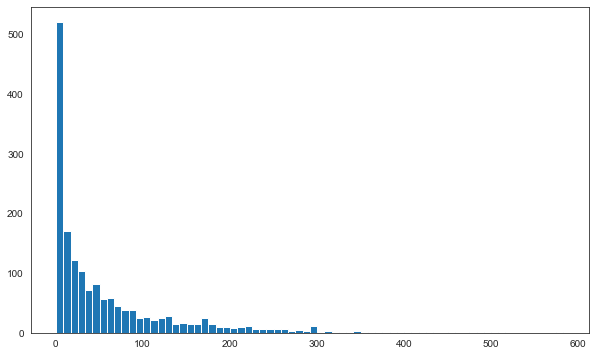

In [130]:
plt.figure(figsize=(10,6))
plt.hist(df7["num of rating"],bins=70)
plt.show()

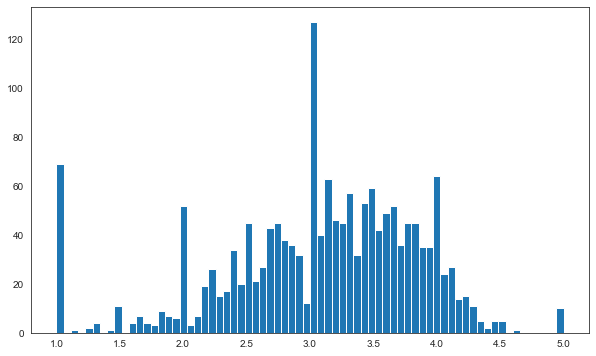

In [131]:
plt.figure(figsize=(10,6))
plt.hist(df7["rating"],bins=70)
plt.show()

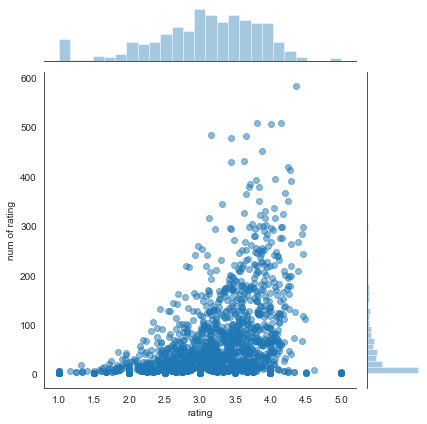

In [134]:
sns.jointplot(x='rating',y='num of rating',data=df7,alpha=0.5)

# Creating Movie Recommedation

In [136]:
df3.head()

,user_id,item_id,rating,timestamp,movie_title
0,196,242,3,881250949,Kolya (1996)
1,63,242,3,875747190,Kolya (1996)
2,226,242,5,883888671,Kolya (1996)
3,154,242,3,879138235,Kolya (1996)
4,306,242,5,876503793,Kolya (1996)


In [138]:
movie_mat=df3.pivot_table(index="user_id",columns="movie_title",values='rating')
movie_mat

movie_title,'Til There Was You (1997),1-900 (1994),101 Dalmatians (1996),12 Angry Men (1957),187 (1997),2 Days in the Valley (1996),"20,000 Leagues Under the Sea (1954)",2001: A Space Odyssey (1968),3 Ninjas: High Noon At Mega Mountain (1998),"39 Steps, The (1935)",...,Yankee Zulu (1994),Year of the Horse (1997),You So Crazy (1994),Young Frankenstein (1974),Young Guns (1988),Young Guns II (1990),"Young Poisoner's Handbook, The (1995)",Zeus and Roxanne (1997),unknown,Á köldum klaka (Cold Fever) (1994)
user_id,,,,,,,,,,,,,,,,,,,,,
1,NaN,NaN,2.0,5.0,NaN,NaN,3.0,4.0,NaN,NaN,...,NaN,NaN,NaN,5.0,3.0,NaN,NaN,NaN,4.0,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,2.0,NaN,NaN,NaN,NaN,4.0,NaN,NaN,...,NaN,NaN,NaN,4.0,NaN,NaN,NaN,NaN,4.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
939,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
940,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
941,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [141]:
df7.sort_values(by=['num of rating'],ascending=False)

,rating,num of rating
movie_title,,
Star Wars (1977),4.358491,583
Contact (1997),3.803536,509
Fargo (1996),4.155512,508
Return of the Jedi (1983),4.007890,507
Liar Liar (1997),3.156701,485
...,...,...
"Great Day in Harlem, A (1994)",5.000000,1
"Other Voices, Other Rooms (1997)",3.000000,1
Good Morning (1971),1.000000,1


In [213]:
df7

,rating,num of rating
movie_title,,
'Til There Was You (1997),2.333333,9
1-900 (1994),2.600000,5
101 Dalmatians (1996),2.908257,109
12 Angry Men (1957),4.344000,125
187 (1997),3.024390,41
...,...,...
Young Guns II (1990),2.772727,44
"Young Poisoner's Handbook, The (1995)",3.341463,41
Zeus and Roxanne (1997),2.166667,6


In [142]:
stars_war_user_ratings=movie_mat['Star Wars (1977)']
stars_war_user_ratings

user_id
1      5.0
2      5.0
3      NaN
4      5.0
5      4.0
      ... 
939    NaN
940    4.0
941    NaN
942    5.0
943    4.0
Name: Star Wars (1977), Length: 943, dtype: float64

In [143]:
similar_to_starwars=movie_mat.corrwith(stars_war_user_ratings)
similar_to_starwars

movie_title
'Til There Was You (1997)                0.872872
1-900 (1994)                            -0.645497
101 Dalmatians (1996)                    0.211132
12 Angry Men (1957)                      0.184289
187 (1997)                               0.027398
                                           ...   
Young Guns II (1990)                     0.228615
Young Poisoner's Handbook, The (1995)   -0.007374
Zeus and Roxanne (1997)                  0.818182
unknown                                  0.723123
Á köldum klaka (Cold Fever) (1994)            NaN
Length: 1664, dtype: float64

In [223]:
corr_starwards=pd.DataFrame(similar_to_starwars,columns=['Correlation'])
corr_starwards.dropna(inplace=True)
corr_starwards

,Correlation
movie_title,
'Til There Was You (1997),0.872872
1-900 (1994),-0.645497
101 Dalmatians (1996),0.211132
12 Angry Men (1957),0.184289
187 (1997),0.027398
...,...
Young Guns (1988),0.186377
Young Guns II (1990),0.228615
"Young Poisoner's Handbook, The (1995)",-0.007374


In [224]:
corr_starwards=corr_starwards.sort_values(by=['Correlation'],ascending=False)
corr_starwards

,Correlation
movie_title,
Hollow Reed (1996),1.0
Commandments (1997),1.0
Cosi (1996),1.0
No Escape (1994),1.0
Stripes (1981),1.0
...,...
Roseanna's Grave (For Roseanna) (1997),-1.0
For Ever Mozart (1996),-1.0
American Dream (1990),-1.0


In [225]:
corr_starwards.head(10) 
#Here the movies with 5 stars rating with 6 user or less no of user will also be present. which is not appropriate
#We need filtering to exclude these movies who has low ratings or low no of users rated them or both

,Correlation
movie_title,
Hollow Reed (1996),1.0
Commandments (1997),1.0
Cosi (1996),1.0
No Escape (1994),1.0
Stripes (1981),1.0
Star Wars (1977),1.0
Man of the Year (1995),1.0
"Beans of Egypt, Maine, The (1994)",1.0
"Old Lady Who Walked in the Sea, The (Vieille qui marchait dans la mer, La) (1991)",1.0


In [226]:
df7

,rating,num of rating
movie_title,,
'Til There Was You (1997),2.333333,9
1-900 (1994),2.600000,5
101 Dalmatians (1996),2.908257,109
12 Angry Men (1957),4.344000,125
187 (1997),3.024390,41
...,...,...
Young Guns II (1990),2.772727,44
"Young Poisoner's Handbook, The (1995)",3.341463,41
Zeus and Roxanne (1997),2.166667,6


In [227]:
df7.loc["Hollow Reed (1996)",:]

rating           2.333333
num of rating    6.000000
Name: Hollow Reed (1996), dtype: float64

In [228]:
corr_starwards=corr_starwards.join(df7['num of rating'])
corr_starwards=corr_starwards.join(df7['rating'])
corr_starwards

,Correlation,num of rating,rating
movie_title,,,
Hollow Reed (1996),1.0,6,2.333333
Commandments (1997),1.0,3,2.666667
Cosi (1996),1.0,4,4.000000
No Escape (1994),1.0,5,2.400000
Stripes (1981),1.0,5,3.800000
...,...,...,...
Roseanna's Grave (For Roseanna) (1997),-1.0,5,2.800000
For Ever Mozart (1996),-1.0,3,2.000000
American Dream (1990),-1.0,2,2.500000


In [234]:
corr_starwards=corr_starwards[(corr_starwards['num of rating']>100) & (corr_starwards['rating']>3.3)]
corr_starwards=corr_starwards.sort_values(by=['Correlation'],ascending=False)
corr_starwards=corr_starwards[corr_starwards["Correlation"]>0.37]
corr_starwards

,Correlation,num of rating,rating
movie_title,,,
Star Wars (1977),1.000000,583,4.358491
"Empire Strikes Back, The (1980)",0.747981,367,4.204360
Return of the Jedi (1983),0.672556,507,4.007890
Raiders of the Lost Ark (1981),0.536117,420,4.252381


# Prediction

In [172]:
movie_mat

movie_title,'Til There Was You (1997),1-900 (1994),101 Dalmatians (1996),12 Angry Men (1957),187 (1997),2 Days in the Valley (1996),"20,000 Leagues Under the Sea (1954)",2001: A Space Odyssey (1968),3 Ninjas: High Noon At Mega Mountain (1998),"39 Steps, The (1935)",...,Yankee Zulu (1994),Year of the Horse (1997),You So Crazy (1994),Young Frankenstein (1974),Young Guns (1988),Young Guns II (1990),"Young Poisoner's Handbook, The (1995)",Zeus and Roxanne (1997),unknown,Á köldum klaka (Cold Fever) (1994)
user_id,,,,,,,,,,,,,,,,,,,,,
1,NaN,NaN,2.0,5.0,NaN,NaN,3.0,4.0,NaN,NaN,...,NaN,NaN,NaN,5.0,3.0,NaN,NaN,NaN,4.0,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,2.0,NaN,NaN,NaN,NaN,4.0,NaN,NaN,...,NaN,NaN,NaN,4.0,NaN,NaN,NaN,NaN,4.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
939,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
940,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
941,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [175]:
df7

,rating,num of rating
movie_title,,
'Til There Was You (1997),2.333333,9
1-900 (1994),2.600000,5
101 Dalmatians (1996),2.908257,109
12 Angry Men (1957),4.344000,125
187 (1997),3.024390,41
...,...,...
Young Guns II (1990),2.772727,44
"Young Poisoner's Handbook, The (1995)",3.341463,41
Zeus and Roxanne (1997),2.166667,6


In [250]:
def predict_movie(movie_name):
    movie_user_ratings=movie_mat[movie_name]
    similar_to_movie_name=movie_mat.corrwith(movie_user_ratings)
    corr_movies=pd.DataFrame(similar_to_movie_name,columns=['Correlation'])
    corr_movies.dropna(inplace=True)
    corr_movies=corr_movies.join(df7['num of rating'])
    corr_movies=corr_movies.join(df7['rating'])
    corr_movies=corr_movies[(corr_movies['num of rating']>100) & (corr_movies['rating']>3.2)] 
    corr_movies=corr_movies.sort_values(by=['Correlation'],ascending=False)
    corr_movies= corr_movies[corr_movies['Correlation']>0.4]
    print(list(corr_movies.index))
    return corr_movies

In [251]:
corr_movies=predict_movie("Shine (1996)")

['Shine (1996)', 'Kiss the Girls (1997)', "Ulee's Gold (1997)", 'True Lies (1994)', 'Scream 2 (1997)', 'Deer Hunter, The (1978)', 'Cinderella (1950)', 'Casablanca (1942)', 'Die Hard: With a Vengeance (1995)', 'G.I. Jane (1997)', 'Stand by Me (1986)', 'Austin Powers: International Man of Mystery (1997)', 'Con Air (1997)', 'Basic Instinct (1992)', 'Cold Comfort Farm (1995)', 'Little Women (1994)', "William Shakespeare's Romeo and Juliet (1996)", 'Hunchback of Notre Dame, The (1996)', 'Abyss, The (1989)', 'Rock, The (1996)', 'Real Genius (1985)']


In [252]:
corr_movies

,Correlation,num of rating,rating
movie_title,,,
Shine (1996),1.000000,129,3.922481
Kiss the Girls (1997),0.600350,143,3.461538
Ulee's Gold (1997),0.599595,184,3.760870
True Lies (1994),0.554865,208,3.562500
Scream 2 (1997),0.552033,106,3.216981
"Deer Hunter, The (1978)",0.526092,120,3.833333
Cinderella (1950),0.519597,129,3.581395
Casablanca (1942),0.498627,243,4.456790
Die Hard: With a Vengeance (1995),0.461037,151,3.284768
